# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [1]:
from IPython.display import clear_output

In [2]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [3]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [39]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2009-01-01' #'2015-01-01'
end_date = '2024-12-31'   #'2022-07-12'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


TOP_LSE = [
    "AZN.L",       # AstraZeneca PLC
    "SHEL.L",      # Shell plc
    "HSBA.L",      # HSBC Holdings plc
    "ULVR.L",      # Unilever PLC
    "REL.L",       # RELX PLC
    "BP.L",        # BP plc
    "BATS.L",      # British American Tobacco PLC
    "LSEG.L",      # London Stock Exchange Group plc
    "RIO.L",       # Rio Tinto PLC
    "DGE.L",       # Diageo PLC
    "RR.L",        # Rolls-Royce Holdings plc
    "CRH.L",       # CRH plc
    "LLOY.L",      # Lloyds Banking Group plc
    "GSK.L",       # GSK plc
    "BARC.L"       # Barclays PLC
]

# Get the data
data = yf.download(TOP_LSE, start_date, end_date)
data

/tmp/ipython-input-2660613146.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TOP_LSE, start_date, end_date)
[*********************100%***********************]  15 of 15 completed


Price              Close                                                    \
Ticker             AZN.L      BARC.L       BATS.L        BP.L        CRH.L   
Date                                                                         
2009-01-02   2775.548096  144.425201  1847.342163  547.804504  1412.591553   
2009-01-05   2681.176270  148.104889  1827.531250  554.989746  1447.097290   
2009-01-06   2773.562256  150.220581  1792.862671  549.538879  1546.067017   
2009-01-07   2737.799316  156.199982  1737.392578  519.063660  1530.731079   
2009-01-08   2713.958008  162.823334  1769.090332  527.239990  1526.897339   
...                  ...         ...          ...         ...          ...   
2024-12-20  10253.816406  260.182281  2877.517090  378.884644  7470.913086   
2024-12-23  10419.781250  261.531921  2873.519043  380.533966  7516.906738   
2024-12-24  10433.778320  263.481415  2878.516357  381.083710  7528.904785   
2024-12-27  10457.773438  264.831085  2891.509766  385.281860  7482.911621   
2024-12-30  10405.784180  264.681122  2873.519043  386.581329  7392.924316   

Price                                                                      \
Ticker            DGE.L        GSK.L      HSBA.L     LLOY.L        LSEG.L   
Date                                                                        
2009-01-02   971.247009  1262.859009  589.334167  84.078300    491.359955   
2009-01-05   984.183594  1239.426392  586.741699  81.297272    518.912720   
2009-01-06   954.827454  1266.349365  568.379089  76.964027    556.568298   
2009-01-07   942.885864  1278.314819  555.632996  80.133133    523.505188   
2009-01-08   938.905334  1281.305298  553.256775  83.043503    545.088135   
...                 ...          ...         ...        ...           ...   
2024-12-20  2503.250732  1319.550659  760.451050  54.173840  11318.533203   
2024-12-23  2492.256104  1333.545898  764.749084  53.933956  11238.544922   
2024-12-24  2496.254150  1339.044067  771.645935  54.193832  11323.533203   
2024-12-27  2533.735352  1342.042969  776.743591  54.333767  11328.532227   
2024-12-30  2512.745850  1333.545898  781.341492  54.393734  11298.536133   

Price       ...     Volume                                                   \
Ticker      ...      DGE.L     GSK.L    HSBA.L     LLOY.L   LSEG.L    REL.L   
Date        ...                                                               
2009-01-02  ...  2837923.0   7454304  16505086   14761590   210616  1896051   
2009-01-05  ...  4807969.0   9579938  22061087   42543628  1013599  8823292   
2009-01-06  ...  7636098.0  14512049  27424910   68333988  1232602  5279927   
2009-01-07  ...  6634386.0  12343398  32249000   61773768   932390  5871300   
2009-01-08  ...  4388539.0  14727464  25258808   80987055   678916  5521892   
...         ...        ...       ...       ...        ...      ...      ...   
2024-12-20  ...  7432149.0  13999848  75955984  349339807  1386055  5784476   
2024-12-23  ...  1660817.0   3702581  13697932  193151547   444649  2429053   
2024-12-24  ...   730715.0   1960702   3604795   70289585    92070   484832   
2024-12-27  ...  1772645.0   3344268  13069986   63634119   280041  1260940   
2024-12-30  ...  1980687.0   4697717  11565121   43336037   303182  1139345   

Price                                              
Ticker         RIO.L      RR.L    SHEL.L   ULVR.L  
Date                                               
2009-01-02   4617653   9280810   2229827  1198715  
2009-01-05   7905327  30925246   4170417  2463946  
2009-01-06  12329545  20408351   6062471  4356372  
2009-01-07  10415415  26990496   5848723  4100045  
2009-01-08  10071363  15385942   3974562  2774765  
...              ...       ...       ...      ...  
2024-12-20   4376945  23870849  21158730  7470978  
2024-12-23   1119927   6533098   6564724  2386146  
2024-12-24    405243   3908850   3634589   429210  
2024-12-27   1588060   8634979   5924098  1223677  
2024-12-30   1174972   8792530   5181790  145

In [41]:
# Get only columns that have missing values
columns_with_nulls = data.columns[data.isnull().any()].tolist()
print(f"Columns with missing values: {columns_with_nulls}")

Columns with missing values: [('Close', 'DGE.L'), ('High', 'DGE.L'), ('Low', 'DGE.L'), ('Open', 'DGE.L'), ('Volume', 'DGE.L')]


In [42]:
data = data.interpolate(method='linear', limit_direction='both')

In [44]:
# Or check if ALL values are filled
all_filled = data.notnull().all().all()
print(f"All cells filled: {all_filled}")

All cells filled: True


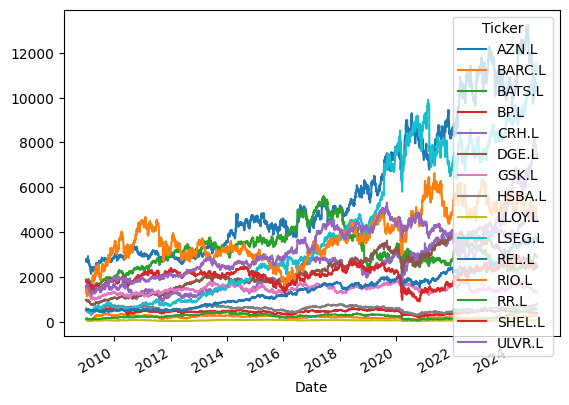

In [6]:
# Plot adjusted close price data
data['Close'].plot()
plt.show()

In [7]:
# Closing price
data = data['Close']
data

Ticker,AZN.L,BARC.L,BATS.L,BP.L,CRH.L,DGE.L,GSK.L,HSBA.L,LLOY.L,LSEG.L,REL.L,RIO.L,RR.L,SHEL.L,ULVR.L
Date,,,,,,,,,,,,,,,
2009-01-02,2775.548096,144.425201,1847.342163,547.804504,1412.591553,971.247009,1262.859009,589.334167,84.078300,491.359955,519.575378,1386.048950,118.048866,1876.492554,1611.643311
2009-01-05,2681.176270,148.104889,1827.531250,554.989746,1447.097290,984.183594,1239.426392,586.741699,81.297272,518.912720,539.482605,1418.777832,124.297989,1853.692993,1589.770630
2009-01-06,2773.562256,150.220581,1792.862671,549.538879,1546.067017,954.827454,1266.349365,568.379089,76.964027,556.568298,531.519897,1576.692017,123.527565,1850.719727,1592.752930
2009-01-07,2737.799316,156.199982,1737.392578,519.063660,1530.731079,942.885864,1278.314819,555.632996,80.133133,523.505188,526.543030,1482.597534,119.846535,1789.260498,1550.001221
2009-01-08,2713.958008,162.823334,1769.090332,527.239990,1526.897339,938.905334,1281.305298,553.256775,83.043503,545.088135,526.543030,1415.504639,119.846535,1824.946655,1572.868408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,10253.816406,260.182281,2877.517090,378.884644,7470.913086,2503.250732,1319.550659,760.451050,54.173840,11318.533203,3628.407715,4665.239258,575.328552,2393.763428,4557.832031
2024-12-23,10419.781250,261.531921,2873.519043,380.533966,7516.906738,2492.256104,1333.545898,764.749084,53.933956,11238.544922,3607.411133,4689.225098,575.528503,2408.259033,4553.832520
2024-12-24,10433.778320,263.481415,2878.516357,381.083710,7528.904785,2496.254150,1339.044067,771.645935,54.193832,11323.533203,3616.409668,4697.220703,575.528503,2428.252930,4561.831055


/tmp/ipython-input-180072949.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')


<Axes: xlabel='Ticker'>

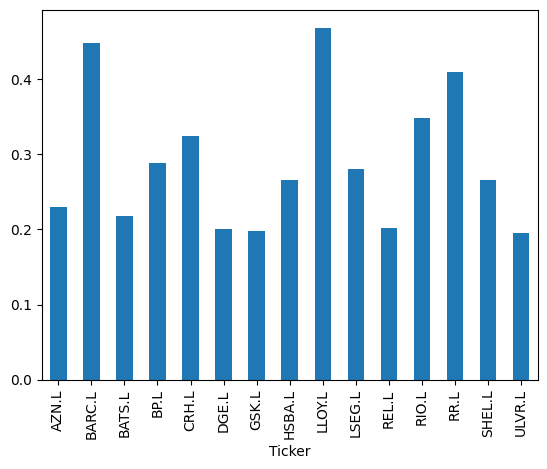

In [8]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

## Process on all dataset


In [9]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

/tmp/ipython-input-1975549246.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()


Ticker,AZN.L,BARC.L,BATS.L,BP.L,CRH.L,DGE.L,GSK.L,HSBA.L,LLOY.L,LSEG.L,REL.L,RIO.L,RR.L,SHEL.L,ULVR.L
Ticker,,,,,,,,,,,,,,,
AZN.L,0.000213,0.000070,0.000064,0.000060,0.000077,0.000067,0.000098,0.000061,0.000051,0.000064,0.000068,0.000059,0.000049,0.000059,0.000064
BARC.L,0.000070,0.000802,0.000081,0.000202,0.000277,0.000097,0.000069,0.000282,0.000568,0.000193,0.000097,0.000270,0.000272,0.000189,0.000055
BATS.L,0.000064,0.000081,0.000190,0.000081,0.000081,0.000082,0.000070,0.000070,0.000067,0.000054,0.000067,0.000069,0.000085,0.000083,0.000076
BP.L,0.000060,0.000202,0.000081,0.000332,0.000150,0.000072,0.000071,0.000135,0.000159,0.000078,0.000072,0.000188,0.000185,0.000248,0.000052
CRH.L,0.000077,0.000277,0.000081,0.000150,0.000423,0.000097,0.000078,0.000154,0.000230,0.000151,0.000112,0.000207,0.000194,0.000146,0.000074
DGE.L,0.000067,0.000097,0.000082,0.000072,0.000097,0.000160,0.000069,0.000079,0.000079,0.000070,0.000081,0.000076,0.000105,0.000073,0.000081
GSK.L,0.000098,0.000069,0.000070,0.000071,0.000078,0.000069,0.000156,0.000062,0.000052,0.000055,0.000065,0.000063,0.000064,0.000072,0.000065
HSBA.L,0.000061,0.000282,0.000070,0.000135,0.000154,0.000079,0.000062,0.000284,0.000263,0.000109,0.000071,0.000177,0.000169,0.000131,0.000060
LLOY.L,0.000051,0.000568,0.000067,0.000159,0.000230,0.000079,0.000052,0.000263,0.000880,0.000179,0.000081,0.000217,0.000240,0.000148,0.000040


In [10]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

/tmp/ipython-input-1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


,0
Ticker,
AZN.L,0.096496
BARC.L,0.035131
BATS.L,0.052671
BP.L,-0.000115
CRH.L,0.134520
DGE.L,0.071341
GSK.L,0.011681
HSBA.L,0.027283
LLOY.L,0.070859


In [11]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

/tmp/ipython-input-1997164593.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


,0
Ticker,
AZN.L,0.230621
BARC.L,0.447910
BATS.L,0.217972
BP.L,0.288228
CRH.L,0.325034
DGE.L,0.200229
GSK.L,0.197323
HSBA.L,0.266373
LLOY.L,0.468994


/tmp/ipython-input-3609916866.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()


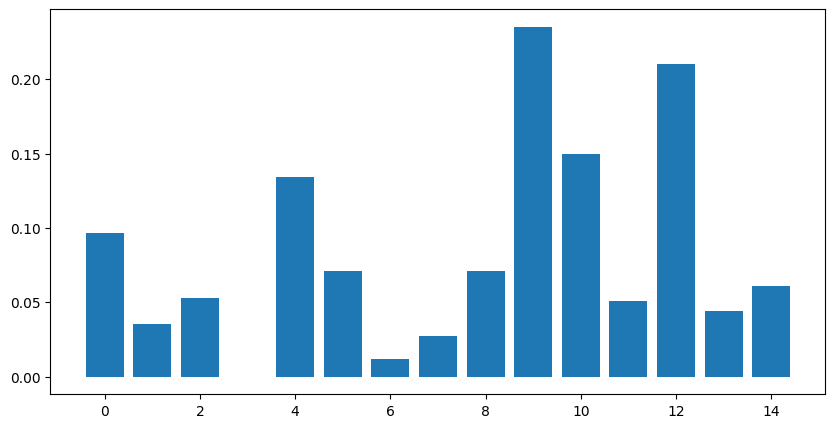

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x1000 with 0 Axes>

In [12]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [13]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [17]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(TOP_LSE)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [18]:

class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [19]:
%%time
problem = PortfolioProblem(mu, cov)
algorithm = NSGA2(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 13.9 s, sys: 28.3 ms, total: 13.9 s
Wall time: 17.5 s


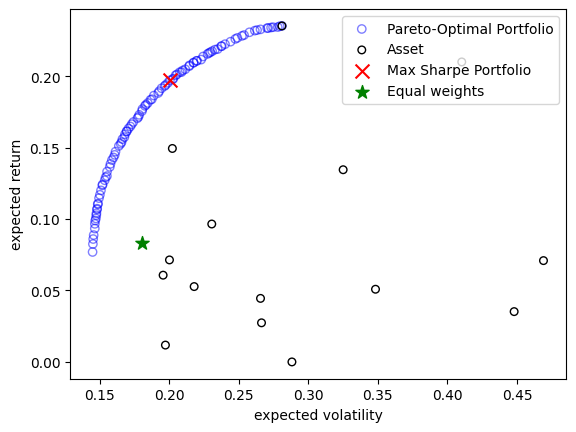

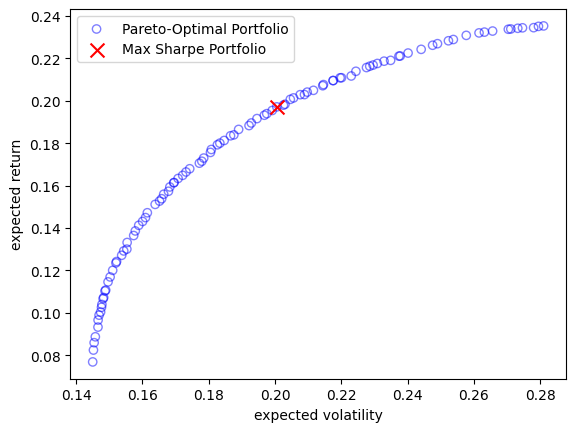

In [20]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(TOP_LSE), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [21]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
LSEG.L 0.4599212933027422
REL.L 0.3897474083662889
RR.L  0.14282165118558265
AZN.L 0.006189178285806989
ULVR.L 0.0013204688595793383
BARC.L 0.0
BATS.L 0.0
BP.L  0.0
CRH.L 0.0
DGE.L 0.0
GSK.L 0.0
HSBA.L 0.0
LLOY.L 0.0
RIO.L 0.0
SHEL.L 0.0


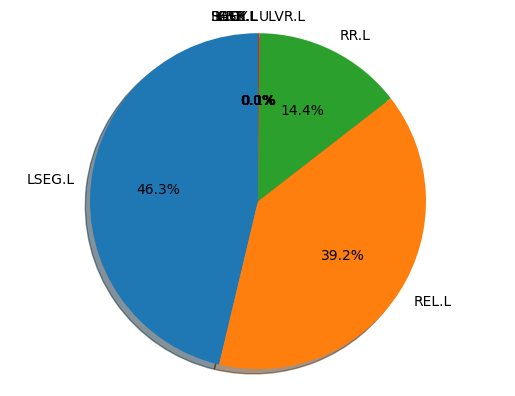

In [22]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)

fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
x = np.zeros((len(TOP_LSE), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.08336191197628914
Volatility =  0.18022379714387388


In [24]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.19711162614046063
Volatility =  0.20053423431783535


## Solve problem with SMS-EMOA

In [26]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(TOP_LSE)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [27]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [28]:
%%time
problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: user 6.58 s, sys: 15.4 ms, total: 6.6 s
Wall time: 9.49 s


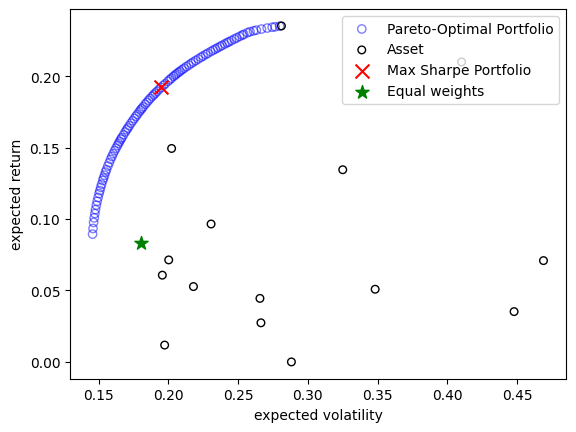

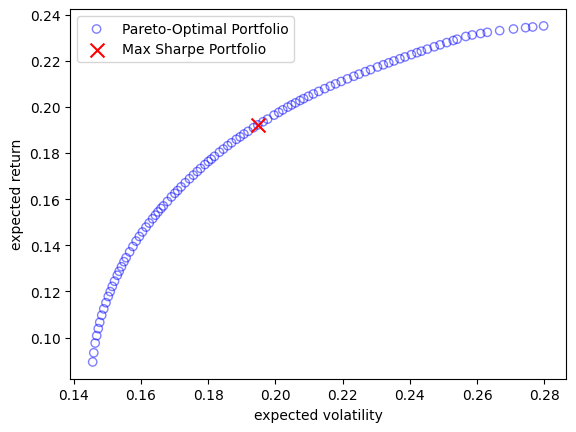

In [29]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(TOP_LSE), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [30]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
LSEG.L 0.450075040895958
REL.L 0.3802204472894445
RR.L  0.11546228305381238
AZN.L 0.05424222876078511
BARC.L 0.0
BATS.L 0.0
BP.L  0.0
CRH.L 0.0
DGE.L 0.0
GSK.L 0.0
HSBA.L 0.0
LLOY.L 0.0
RIO.L 0.0
SHEL.L 0.0
ULVR.L 0.0


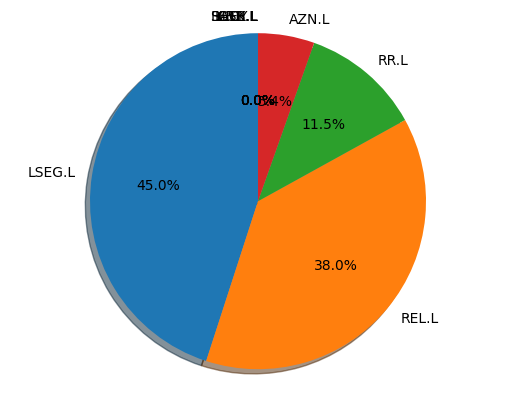

In [31]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)

fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
x = np.zeros((len(TOP_LSE), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.08336191197628914
Volatility =  0.18022379714387388


In [33]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.19218188509960546
Volatility =  0.19476395225556803


In [ ]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html Project_codes.ipynb

[NbConvertApp] WARNING | pattern 'Project_codes.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 